<a href="https://colab.research.google.com/github/Martinsoyyo/Sellos/blob/master/Entrenamiento%20e%20Inferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://download.pytorch.org/libtorch/cu111/libtorch-shared-with-deps-1.8.1%2Bcu111.zip
!unzip libtorch-shared-with-deps-1.8.1+cu111.zip -d /content
!pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.8-cp37-cp37m-linux_x86_64.whl


--2021-05-03 05:14:17--  https://download.pytorch.org/libtorch/cu111/libtorch-shared-with-deps-1.8.1%2Bcu111.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.32.200.47, 13.32.200.94, 13.32.200.21, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.32.200.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2018504007 (1.9G) [application/zip]
Saving to: ‘libtorch-shared-with-deps-1.8.1+cu111.zip’

libtorch-shared-wit 100%[===================>]   1.88G  46.7MB/s    in 48s     

2021-05-03 05:15:05 (39.9 MB/s) - ‘libtorch-shared-with-deps-1.8.1+cu111.zip’ saved [2018504007/2018504007]

Archive:  libtorch-shared-with-deps-1.8.1+cu111.zip
   creating: /content/libtorch/
   creating: /content/libtorch/lib/
  inflating: /content/libtorch/lib/libasmjit.a  
  inflating: /content/libtorch/lib/libbenchmark.a  
  inflating: /content/libtorch/lib/libbenchmark_main.a  
  inflating: /content/libtorch/lib/libc10_cuda.so  
  inflating: /content/libto

In [2]:
!apt remove --purge --auto-remove cmake
!version=3.16 
!build=5 
%cd ~/temp 
!wget https://cmake.org/files/v3.16/cmake-3.16.5.tar.gz 
!tar -xzvf cmake-3.16.5.tar.gz 
%cd cmake-3.16.5/
!./bootstrap 
!make -j$(nproc) 
!sudo make install

Se truncaron las últimas líneas 5000 del resultado de transmisión.
-- Performing Curl Test HAVE_GETHOSTBYADDR_R_7_REENTRANT - Failed
-- Performing Curl Test HAVE_GETHOSTBYADDR_R_8_REENTRANT
-- Performing Curl Test HAVE_GETHOSTBYADDR_R_8_REENTRANT - Success
-- Performing Curl Test HAVE_GETHOSTBYNAME_R_3
-- Performing Curl Test HAVE_GETHOSTBYNAME_R_3 - Failed
-- Performing Curl Test HAVE_GETHOSTBYNAME_R_5
-- Performing Curl Test HAVE_GETHOSTBYNAME_R_5 - Failed
-- Performing Curl Test HAVE_GETHOSTBYNAME_R_6
-- Performing Curl Test HAVE_GETHOSTBYNAME_R_6 - Success
-- Performing Curl Test HAVE_GETHOSTBYNAME_R_3_REENTRANT
-- Performing Curl Test HAVE_GETHOSTBYNAME_R_3_REENTRANT - Failed
-- Performing Curl Test HAVE_GETHOSTBYNAME_R_5_REENTRANT
-- Performing Curl Test HAVE_GETHOSTBYNAME_R_5_REENTRANT - Failed
-- Performing Curl Test HAVE_GETHOSTBYNAME_R_6_REENTRANT
-- Performing Curl Test HAVE_GETHOSTBYNAME_R_6_REENTRANT - Success
-- Performing Curl Test HAVE_IN_ADDR_T
-- Performing Curl Test 

In [3]:
!nvidia-smi

Mon May  3 05:27:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
%cd /content/
!git clone https://github.com/Martinsoyyo/Sellos.git


/content
Cloning into 'Sellos'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 118 (delta 65), reused 83 (delta 30), pack-reused 0
Receiving objects: 100% (118/118), 1.90 MiB | 37.44 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [7]:
# Compilación y build del código
!mkdir /content/Sellos/Sellos/build
#copio los tensores a la carpeta donde esta el executable
#!time cp /content/drive/64x64*.tensor /content/Sellos/Sellos/build
!time cp  /content/Sellos/Sellos/CONFIG.txt /content/Sellos/Sellos/build

mkdir: cannot create directory ‘/content/Sellos/Sellos/build’: File exists

real	0m0.004s
user	0m0.001s
sys	0m0.002s


In [11]:
%cd /content/Sellos/Sellos/build
!cmake -DCMAKE_PREFIX_PATH=/content/libtorch .. 
!cmake --build . --config Release

/content/Sellos/Sellos/build
-- Caffe2: CUDA detected: 11.0
-- Caffe2: CUDA nvcc is: /usr/local/cuda/bin/nvcc
-- Caffe2: CUDA toolkit directory: /usr/local/cuda
-- Caffe2: Header version is: 11.0
-- Found cuDNN: v7.6.5  (include: /usr/include, library: /usr/lib/x86_64-linux-gnu/libcudnn.so)
CMake Warning at /content/libtorch/share/cmake/Caffe2/public/cuda.cmake:198 (message):
  Failed to compute shorthash for libnvrtc.so
Call Stack (most recent call first):
  /content/libtorch/share/cmake/Caffe2/Caffe2Config.cmake:88 (include)
  /content/libtorch/share/cmake/Torch/TorchConfig.cmake:68 (find_package)
  CMakeLists.txt:4 (find_package)


-- Autodetected CUDA architecture(s):  7.5
-- Added CUDA NVCC flags for: -gencode;arch=compute_75,code=sm_75
-- Configuring done
-- Generating done
-- Build files have been written to: /content/Sellos/Sellos/build
Scanning dependencies of target Sellos
[ 25%] Building CXX object CMakeFiles/Sellos.dir/main.cpp.o
Elapsed time: 8 s. (time), 0.000368 s. (cloc

In [ ]:
!time ./Sellos [TEST002]
!time ./Sellos [TEST002]
!time ./Sellos [TEST002]
!time ./Sellos [TEST002]
!time ./Sellos [TEST002]

In [1]:
import torch
import torch.nn as nn
from collections import OrderedDict

CV_BN_RELU0 = nn.Sequential(OrderedDict([
          ('0', nn.Conv2d(1,8,3,1,1,1,1,0)),
          ('1', nn.Dropout(0.005)),
          ('2', nn.BatchNorm2d(8)),
          ('3', nn.ReLU())
        ]))

CV_BN_RELU1 = nn.Sequential(OrderedDict([
          ('0', nn.Conv2d(8,8,3,1,1,1,1,0)),
          ('1', nn.Dropout(0.005)),
          ('2', nn.BatchNorm2d(8)),
          ('3', nn.ReLU())
        ]))

MAXPOOL = nn.MaxPool2d(2,2,0)

FEATURES = nn.Sequential()

FEATURES.add_module('0', CV_BN_RELU0)
FEATURES.add_module('1', MAXPOOL)
FEATURES.add_module('2', CV_BN_RELU1)
FEATURES.add_module('3', MAXPOOL)
FEATURES.add_module('4', CV_BN_RELU1)
FEATURES.add_module('5', MAXPOOL)
FEATURES.add_module('6', CV_BN_RELU1)
FEATURES.add_module('7', MAXPOOL)

CLASSIFIER = nn.Sequential(OrderedDict([
          ('0', nn.Flatten()),
          ('1', nn.Linear(128,8)),
          ('2', nn.ReLU()),
          ('3', nn.Linear(8,8)),
          ('4', nn.ReLU()),
          ('5', nn.Linear(8,2)),
        ]))

VGG =  nn.Sequential(OrderedDict([
            ('FEATURES', FEATURES),
            ('CLASSIFIER', CLASSIFIER),
            ('2', nn.LogSoftmax(1))
            ]))


VGG.eval()

#image_in = torch.randn(1,1,32,32)
print(VGG)
#print(image_in)
#print(VGG.forward(image_in))


Sequential(
  (FEATURES): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): Dropout(p=0.005, inplace=False)
      (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU()
    )
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Sequential(
      (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): Dropout(p=0.005, inplace=False)
      (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU()
    )
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): Dropout(p=0.005, inplace=False)
      (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU()
    )

In [2]:
checkpoint = torch.jit.load('/content/drive/MyDrive/VGG,B 1,D 0.005000,CL(8 0 8 0 8 0 8 0 ),LL(8 8 )1.000000%.pt')
print(checkpoint)

RecursiveScriptModule(
  original_name=Module
  (FEATURES): RecursiveScriptModule(
    original_name=Module
    (0): RecursiveScriptModule(
      original_name=Module
      (0): RecursiveScriptModule(original_name=Module)
      (1): RecursiveScriptModule(original_name=Module)
      (2): RecursiveScriptModule(original_name=Module)
    )
    (1): RecursiveScriptModule(original_name=Module)
    (2): RecursiveScriptModule(
      original_name=Module
      (0): RecursiveScriptModule(original_name=Module)
      (1): RecursiveScriptModule(original_name=Module)
      (2): RecursiveScriptModule(original_name=Module)
    )
    (3): RecursiveScriptModule(original_name=Module)
    (4): RecursiveScriptModule(
      original_name=Module
      (0): RecursiveScriptModule(original_name=Module)
      (1): RecursiveScriptModule(original_name=Module)
      (2): RecursiveScriptModule(original_name=Module)
    )
    (5): RecursiveScriptModule(original_name=Module)
    (6): RecursiveScriptModule(
      origi

In [3]:
VGG.load_state_dict(checkpoint.state_dict())

<All keys matched successfully>

In [ ]:
print("Model's state_dict:")
for param_tensor in checkpoint.state_dict():
    print(param_tensor, "\t", checkpoint.state_dict()[param_tensor])

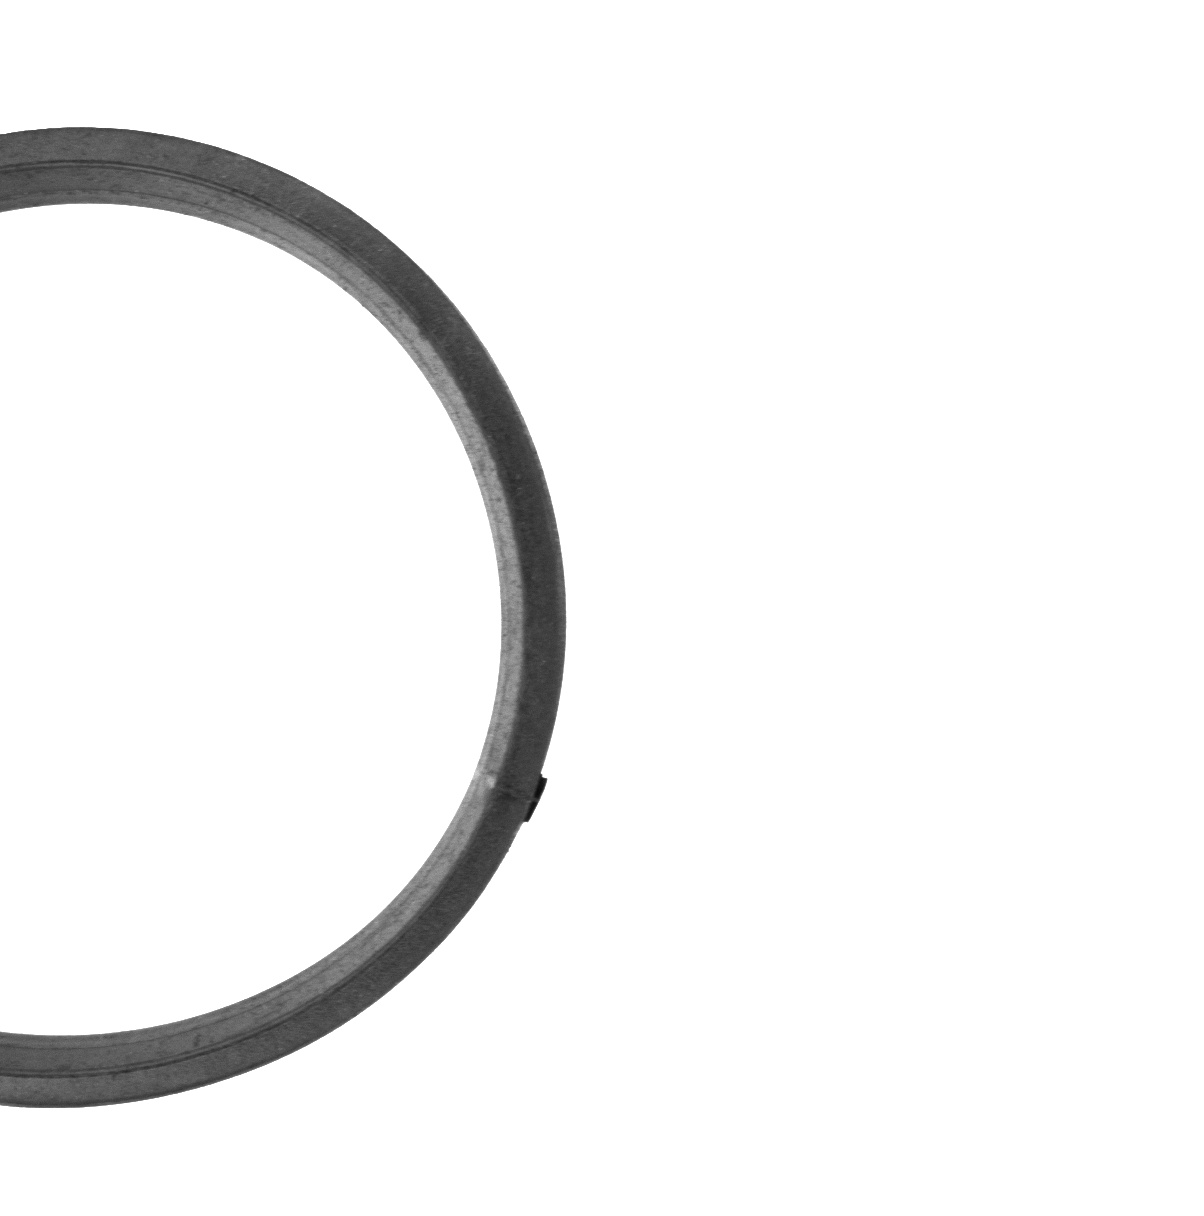

torch.Size([1, 1, 64, 64])
torch.FloatTensor


In [4]:
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

import cv2 
import torch
import torchvision.transforms as T


#path = '/content/drive/MyDrive/43.jpg'  
path = '/content/drive/MyDrive/KQHT_C3_pza=101-pos=2-img=0063-01074ms(1).jpg'
#path = '/content/drive/MyDrive/KQHT_C3_pza=100-pos=3-img=0073-01395ms(1).jpg'

# Reading an image in default mode
src = cv2.imread(path)

# resize image
#src = cv2.resize(src, (64,64))
  
# Using cv2.cvtColor() method
# Using cv2.COLOR_BGR2GRAY color space
# conversion code
#image = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY )
  
# Displaying the image 
cv2_imshow(src)

trf = T.Compose([
                 T.ToTensor(),
                 T.Grayscale(),
                 T.Resize(64),
                ])

PICTURE_TO_TRY = trf(src).unsqueeze(0)
print(PICTURE_TO_TRY.size())
print(PICTURE_TO_TRY.type())

torch.set_printoptions(profile="full")

In [27]:
VGG.eval()
result = VGG.forward(PICTURE_TO_TRY)
print(result)
print(result.argmax(dim=1))

tensor([[-27.8082,   0.0000]], grad_fn=<LogSoftmaxBackward>)
tensor([1])


In [26]:
A = torch.ones(1,1,64,64)
result = VGG.forward(A)
print(result)

tensor([[-0.2352, -1.5625]], grad_fn=<LogSoftmaxBackward>)


In [22]:
VGG.train()

Sequential(
  (FEATURES): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): Dropout(p=0.005, inplace=False)
      (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU()
    )
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Sequential(
      (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): Dropout(p=0.005, inplace=False)
      (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU()
    )
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): Dropout(p=0.005, inplace=False)
      (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU()
    )

In [24]:
VGG.eval()

Sequential(
  (FEATURES): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): Dropout(p=0.005, inplace=False)
      (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU()
    )
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Sequential(
      (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): Dropout(p=0.005, inplace=False)
      (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU()
    )
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): Dropout(p=0.005, inplace=False)
      (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU()
    )